# Sage

Sage (o sagemath) es un programa libre cuyo objetivo es ser una alternativa abierta programas como Maple, mathematica, etc.

Una de las filosofías de sage es ser como un "pegamento" entre varios programas de matemáticas que había flotando en el internet. Usa python como pegamento: todo lo que puedes hacer en python también lo puedes hacer en sage, pero sage trae más cosas para manejar matemáticas.

## Documentación

La documentación de sage es muy buena. Siempre trae ejemplos de todo. Se llama con ?

In [ ]:
prime_divisors?

In [ ]:
prime_divisors(2020)

In [ ]:
factor(2020)

## Variables simbólicas

Podemos declarar variables simbólicas así:

In [ ]:
var('x')

In [ ]:
x

In [ ]:
var('y')

In [ ]:
var('x y z')

In [ ]:
x**2 + 2*y-z

Lo anterior es una expresión simbólica.

In [ ]:
expr = x**2+y

In [ ]:
expr

In [ ]:
f(x,y) = x**2+y

In [ ]:
f

In [ ]:
f(x,y)

In [ ]:
f(z,3)

In [ ]:
type(expr)

In [ ]:
type(f)

In [ ]:
f(3,5)

También tenemos ecuaciones:

In [ ]:
x==3

Noten que no me respondió "False". Más bien, como x es una expresión, decidió que era una ecuación lo anterior. Igual con <,>, etc.

In [ ]:
x < 3

## solve

Obviamente sage sabe resolver ecuaciones, sistemas de ecuaciones, etc.

In [ ]:
solve(x**2+2*x-4 == 0,x)

In [ ]:
solutions = solve(x**2+2*x-4 == 0,x)

In [ ]:
solutions[0].rhs()

In [ ]:
solve([x+y==8,x*y==15],(x,y))

In [ ]:
solve(x^2>9, x)

## Plot

Uno de los comandos más completos que trae sage es "plot". Puede hacer básicamente lo que quieras y es muy sencillo de usar.

In [ ]:
plot(sin(x),x,-5,5)

In [ ]:
plot(sin(x),x,-5,5,thickness=8)

Puedes graficar una lista:

In [ ]:
plot([sin(i*x) for i in range(10)],x,-1,1)

Otra manera en donde tienes más control es "sumar" plots (i.e. graficar juntos)

In [ ]:
plot(sin(x),x,-5,5,color="green") + plot(cos(x),-5,5,color="red")

In [ ]:
P = plot(sin(x),x,-5,5)

In [ ]:
P.show(dpi=300,frame=True,gridlines=True)

O en 3 dimensiones...

In [ ]:
plot3d(x^2 + y^2, (-2,2), (-2,2))

In [ ]:
var('t')
parametric_plot( (cos(t), sin(t)), (t, 0, pi))

Puedes graficar "implícitamente" también (es decir, graficar $\{(x,y) : f(x,y)=0\}$):

In [ ]:
implicit_plot(x**2+y**2-1,xrange=(-1,1),yrange=(-1,1))

### Figuras geométricas

In [ ]:
point2d((1,1))

In [ ]:
import random

In [ ]:
sum([point2d((random.random(), random.random())) for _ in range(100)])

In [ ]:
circle((0,0),1)

In [ ]:
line2d([(0,0),(2,1),(2,-3),(0,0)])

In [ ]:
polygon2d([[1,2], [5,6], [5,0]], rgbcolor=(1,0,1))

### Ejercicios

1. Dibuja un triángulo cuyo borde sea azul y cuyo interior sea verde.
2. Dada $n\in\mathbb{N}$, dibuja un $n$-ágono regular (que no haya ejes).
3. (opcional) Crea arte con círculos, polígonos, etc.


In [ ]:
# De los ejemplos de sage:
L = [[6*cos(pi*i/100)+5*cos((6/2)*pi*i/100),6*sin(pi*i/100)-5*sin((6/2)*pi*i/100)] for i in range(200)]
polygon(L)

## Cálculo 

In [ ]:
derivative(x**5,x)

In [ ]:
integral(x**5,x)

In [ ]:
x

In [ ]:
integral(log(log(x**2)),x)

In [ ]:
integral(1/log(x), x)

In [ ]:
Ei(5.0)

In [ ]:
F(x) = x**3 - 2*x**2 + 1
f = derivative(F)

In [ ]:
f(3)

In [ ]:
plot([F,f])

In [ ]:
var('a')

In [ ]:
lim((a**2-1)/(a-1),a=1)

### Ejercicios

1. Crea una función que tome como parámetros una función (diferenciable) $f$ y un valor $x\in\mathbb{R}$. Después dibuja la función y la recta tangente a la gráfica que pasa por $(x,f(x))$.
2. Dada una función $f$ en un intervalo $[a,b]$, dibuja la aproximación de Riemmann de la integral. Algo así pues: 

In [ ]:
def grafica_f_y_tangente(f,a,b,x0):
    g(x) = derivative(f(x),x)
    m = g(x0)
    y(x) = m*(x-x0) + f(x0)
    return point2d((x0,f(x0)),color='black') + plot(f(x),x,a,b) + plot(y(x),x,a,b,color='red')

In [ ]:
grafica_f_y_tangente(cos,0,pi,0.74)

In [ ]:
def rect(x,y,w):
    points = [(x,0),(x+w,0),(x+w,y),(x,y)]
    #border = line2d(points+[points[0]],color='black',thickness=1)
    return polygon2d(points,color='grey',edgecolor='black')#+border

In [ ]:
import random

In [ ]:
def riemmann(f,a,b,n):
    P = plot(f(x),x,a,b)
    dx = (b-a)/n
    X = [a+dx*i for i in range(n)]
    P += sum([rect(x,f(x+random.random()*dx),dx) for x in X])
    return P

In [ ]:
riemmann(cos,-3,3,30).show(dpi=300)

3. Dada una función $f$ y un punto $x$, grafica las aproximaciones de Taylor de órdenes 0,1,2,3,4. (Hint: usa la función "taylor" (e.g. `taylor(cos(x),x,0,6)`). Para pto extra: programa taylor.)
4. Juega un rato con plot. Lee las instrucciones. Corre los ejemplos. Se feliz.
5. Crea un número $n$ de variables simbólicas. Algo como $x_1$, $x_2$, ..., $x_n$

In [ ]:
def taylor_approx(f,x0,a=0.0,b=1.):
    colores = ["red","green","yellow","black","brown","orange",(random.random(),random.random(),random.random())]
    return plot(f(x),x,a,b)+sum([plot(taylor(f(x),x,x0,i),x,a,b,color=colores[i]) for i in range(7)])

In [ ]:
taylor_approx(cos,0.3,-pi,pi)

In [ ]:
n = 8
for i in range(n):
    var(f'x{i}')

## Anillos, grupos, etc.

Sage puede trabajar con campos, anillos, grupos, etc. ZZ son los enteros, QQ son los racionales, RR son los reales con  53-bits de precisión, CC los complejos, etc.

In [1]:
ZZ

Integer Ring

In [2]:
QQ

Rational Field

In [4]:
QQbar

Algebraic Field

In [5]:
3/2 in QQ

True

In [6]:
sqrt(2) in QQ

False

In [7]:
pi in QQ

False

In [8]:
list(QQ)

KeyboardInterrupt: 

In [ ]:
0 in QQ

In [ ]:
3.6 in QQ

In [ ]:
ZZ

In [ ]:
RR

In [ ]:
CC

In [13]:
I = sqrt(-1)

In [14]:
I in CC

True

In [15]:
I**2

-1

Podemos crear anillos de polinomios:

In [20]:
var('t')

t

In [21]:
QQ[t]

Univariate Polynomial Ring in t over Rational Field

In [22]:
x**2 - 2 in QQ[x]

True

In [23]:
1/(x**2-2) in QQ[x]

False

In [53]:
f.<t> = PolynomialRing(QQ)
g.<z> = PolynomialRing(RR)

In [27]:
factor(t^2-2)

t^2 - 2

In [28]:
factor(z^2-2)

(z - 1.41421356237310) * (z + 1.41421356237310)

In [34]:
RR[t,z](t)+z

t + z

In [37]:
i = 8

In [38]:
reset('i')

In [39]:
i**2

-1

In [40]:
GF(3)

Finite Field of size 3

In [41]:
h.<w> = PolynomialRing(GF(3))

In [42]:
factor(w**2+w+1)

(w + 2)^2

In [51]:
QQ.random_element()

3419

Los enteros módulo $n$ se ponen como Integers(n)

In [72]:
Z3 = Integers(3)

In [73]:
Z3

Ring of integers modulo 3

In [79]:
2+Z3(8)

1

In [77]:
Z = Z3[x]

In [78]:
g=Z(5*x**2-3*x+1); g

2*x^2 + 1

In [80]:
g.base_ring()

Ring of integers modulo 3

In [81]:
Z3.is_field()

True

## Grupos

In [114]:
G = SymmetricGroup(4)

In [98]:
G('(2,4)(1,3)') == list(G)[1]*list(G)[2]

False

In [93]:
list(G)[1]*list(G)[2]

(1,2)(3,4)

In [101]:
G.subgroups()

[Subgroup generated by [()] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,2)(3,4)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,3)(2,4)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,4)(2,3)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(3,4)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(2,3)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(2,4)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,2)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,3)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,4)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(2,4,3)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generate

In [102]:
G.multiplication_table()

*  a b c d e f g h i j k l m n o p q r s t u v w x
 +------------------------------------------------
a| a b c d e f g h i j k l m n o p q r s t u v w x
b| b a d c f e h g j i l k n m p o r q t s v u x w
c| c e a f b d i k g l h j o q m r n p u w s x t v
d| d f b e a c j l h k g i p r n q m o v x t w s u
e| e c f a d b k i l g j h q o r m p n w u x s v t
f| f d e b c a l j k h i g r p q n o m x v w t u s
g| g h m n s t a b o p u v c d i j w x e f k l q r
h| h g n m t s b a p o v u d c j i x w f e l k r q
i| i k o q u w c e m r s x a f g l t v b d h j n p
j| j l p r v x d f n q t w b e h k s u a c g i m o
k| k i q o w u e c r m x s f a l g v t d b j h p n
l| l j r p x v f d q n w t e b k h u s c a i g o m
m| m s g t h n o u a v b p i w c x d j k q e r f l
n| n t h s g m p v b u a o j x d w c i l r f q e k
o| o u i w k q m s c x e r g t a v f l h n b p d j
p| p v j x l r n t d w f q h s b u e k g m a o c i
q| q w k u i o r x e s c m l v f t a g j p d n b h
r| r x l v j p q w f t d n k u 

In [103]:
G.is_abelian()

False

In [104]:
G.is_simple()

False

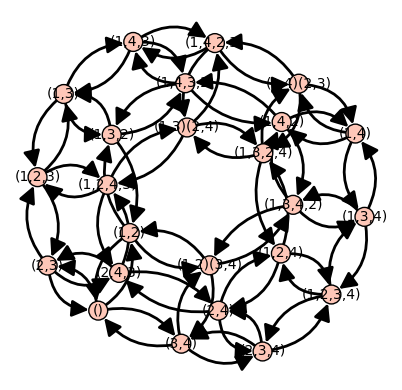

In [105]:
G.cayley_graph().plot()

In [109]:
G.normal_subgroups()

[Subgroup generated by [(1,2), (1,2,3,4)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(2,3,4), (1,2,3)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [(1,2)(3,4), (1,4)(2,3)] of (Symmetric group of order 4! as a permutation group),
 Subgroup generated by [()] of (Symmetric group of order 4! as a permutation group)]

In [110]:
H=G.normal_subgroups()[0]

In [112]:
H.centralizer(G)

Subgroup generated by [()] of (Subgroup generated by [(1,2), (1,2,3,4)] of (Symmetric group of order 4! as a permutation group))

In [115]:
len(G)

24

In [116]:
G = PermutationGroup(['(1,2,3)(4,5)', '(3,4)'])

In [117]:
G

Permutation Group with generators [(3,4), (1,2,3)(4,5)]

In [118]:
G.normal_subgroups()

[Subgroup generated by [()] of (Permutation Group with generators [(3,4), (1,2,3)(4,5)]),
 Subgroup generated by [(1,3)(2,4), (1,5)(3,4), (1,5)(2,4)] of (Permutation Group with generators [(3,4), (1,2,3)(4,5)]),
 Subgroup generated by [(3,4), (1,2,3)(4,5)] of (Permutation Group with generators [(3,4), (1,2,3)(4,5)])]

In [119]:
G.normalizer(H)

Subgroup generated by [(2,3), (2,4), (1,2)] of (Permutation Group with generators [(3,4), (1,2,3)(4,5)])

## Álgebra Lineal

Obviamente sage trae cosas para hacer álgebra lineal.

In [153]:
M = Matrix(QQ,4,4,range(16
                       ))

In [154]:
M

[ 0  1  2  3]
[ 4  5  6  7]
[ 8  9 10 11]
[12 13 14 15]

In [155]:
type(M)

<class 'sage.matrix.matrix_rational_dense.Matrix_rational_dense'>

In [156]:
M.base_ring()

Rational Field

In [157]:
M*M.transpose()

[ 14  38  62  86]
[ 38 126 214 302]
[ 62 214 366 518]
[ 86 302 518 734]

In [158]:
latex(M)

\left(\begin{array}{rrrr}
0 & 1 & 2 & 3 \\
4 & 5 & 6 & 7 \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15
\end{array}\right)

In [159]:
M.eigenvalues()

[0, 0, -2.464249196572981?, 32.46424919657298?]

In [160]:
M.eigenvectors_left()

[(0,
  [
  (1, 0, -3, 2),
  (0, 1, -2, 1)
  ],
  2),
 (-2.464249196572981?,
  [(1, 0.5274241214897682?, 0.05484824297953641?, -0.4177276355306954?)],
  1),
 (32.46424919657298?,
  [(1, 1.151147307081661?, 1.302294614163321?, 1.453441921244981?)],
  1)]

In [170]:
M=Matrix([[1,2,3],[3,8,9],[5,6,-2]])

In [171]:
M.inverse()

[ 35/17 -11/17   3/17]
[  -3/2    1/2      0]
[ 11/17  -2/17  -1/17]

In [172]:
M.echelon_form()

[ 1  0  3]
[ 0  2  0]
[ 0  0 17]

In [173]:
M

[ 1  2  3]
[ 3  8  9]
[ 5  6 -2]

In [181]:
M = Matrix([[1,2,3],
            [0,17,6],
            [0,0,9]
           ])

In [182]:
N=M.inverse()

In [183]:
M.diagonalization()

ValueError: matrix entries must be from a field

In [184]:
M.parent()

Full MatrixSpace of 3 by 3 dense matrices over Integer Ring

In [185]:
M=M.change_ring(QQ)

In [186]:
type(M)

<class 'sage.matrix.matrix_rational_dense.Matrix_rational_dense'>

In [187]:
M.diagonalization()

(
[17  0  0]  [   1    1    1]
[ 0  9  0]  [   8   -4    0]
[ 0  0  1], [   0 16/3    0]
)

In [188]:
M=M.change_ring(CC)

In [190]:
m = matrix([[5,4,2,1],[0,1,-1,-1],[-1,-1,3,0],[1,1,-1,2]]); m

[ 5  4  2  1]
[ 0  1 -1 -1]
[-1 -1  3  0]
[ 1  1 -1  2]

In [193]:
m.jordan_form()

[2|0|0 0]
[-+-+---]
[0|1|0 0]
[-+-+---]
[0|0|4 1]
[0|0|0 4]

In [194]:
B = matrix([[1],[2],[3],[4]])

In [195]:
B.nrows()

4

In [196]:
M.nrows()

4

In [197]:
M.solve_right(B)

[-41/8]
[ 11/2]
[  9/8]
[ 19/8]

### Ejercicios

1. Crea una función que regrese una matriz aleatoria de $m\times n$.
2. Encuentra el determinante y la traza de una matriz.
4. Invierte cada uno de las entradas de la matriz (en vez de invertir la matriz!).
5. Muestra que el grupo alternante $\mathbb{A}_5$ no contiene subgrupos de orden 15.
6. ¿Cuántos 3-subgrupos de Sylow tiene $S_6$?


In [204]:
import random
n=2
m=2
A=matrix(n,m,[random.random() for i in range(n*m)])
print(A)
A.randomize()
print(A)

[  0.312804013097171 0.43612549656614175]
[0.04147995567882068 0.43115387678206185]
[  0.786481371322995 -0.8519027780813293]
[ 0.8735369722761022 0.13433153704448308]


In [205]:
A.det()

0.8498178249054353

In [206]:
A.trace()

0.9208129083674781

In [209]:
1/A*A

[     0.9999999999999999 -4.3273637543733805e-17]
[ 2.8286248105913434e-17      1.0000000000000002]

In [207]:
sum([A[i,i] for i in range(A.nrows())])

0.9208129083674781

In [216]:
def invierte(M):
    return matrix(RR,[[1/a for a in m] for m in M])

In [220]:
A.elementwise_product(invierte(A))

[0.9999999999999999                1.0]
[               1.0                1.0]

In [226]:
len([g for g in AlternatingGroup(5).subgroups() if g.order()==15])

0

In [228]:
len([g for g in SymmetricGroup(6).subgroups() if len(g)==9])

10

In [231]:
dict(factor(12))

{2: 2, 3: 1}

In [232]:
def is_power_p(n,p):
    while n%p==0:
        n//=p
    return n==1

In [236]:
is_power_p(65536,2)

True

## Aproximaciones numéricas

Como vimos antes, sage no puede resolver cualquier ecuación, obviamente.

In [237]:
solve(cos(x)==sin(x), x)

[sin(x) == cos(x)]

In [240]:
var('y')

y

In [243]:
find_root([cos(x)==sin(x+y),x-y==0])

TypeError: find_root() missing 2 required positional arguments: 'a' and 'b'

In [244]:
find_root??

Signature:      
find_root(
    f,
    a,
    b,
    xtol=1e-12,
    rtol=8.881784197001252e-16,
    maxiter=100,
    full_output=False,
)
Type:            LazyImport
String form:     <function find_root at 0x7f27664cd4c0>
File:            /usr/lib/python3.8/site-packages/sage/misc/lazy_import.pyx
Source:         
def find_root(f, a, b, xtol=10e-13, rtol=2.0**-50, maxiter=100, full_output=False):
    r"""
    Numerically find a root of ``f`` on the closed interval `[a,b]`
    (or `[b,a]`) if possible, where ``f`` is a function in the one variable.
    Note: this function only works in fixed (machine) precision, it is not
    possible to get arbitrary precision approximations with it.

    INPUT:

    - ``f`` -- a function of one variable or symbolic equality

    - ``a``, ``b`` -- endpoints of the interval

    - ``xtol``, ``rtol`` -- the routine converges when a root is known
      to lie within ``xtol`` of the value return. Should be `\geq 0`.
      The routine modifies this to take 